![Logo UAH](https://fen.uahurtado.cl/wp-content/uploads/2019/01/logo-fen-2018-860x120-1.png "Logo UAH")
# <center>Trabajo 1
#### **Nombre** : Juan Licanqueo

Utilice los datos la base de datos que estamos usando en el curso.
1. Escoja una empresa de la base de datos. Cualquiera.
2. Tome un indicador o variable relevante del Balance, por ejemplo, Activo Total, Caja o Utilidad_operacional_div_Ventas, y desestacionalice la serie, que información cualitativa-cuantitativa le entrega el indicador.
3. Tome unas cuatro variables relevantes y gráfique sus boxplot.
4. Compare las variables de la empresa respecto del grupo de empresas a la cuál pertenece la empresa que eligió.

### Cargamos los modulos a usar.

In [2]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

### Definimos nuestro directorio de trabajo.

In [3]:
os.chdir('/Users/Juan/Desktop/analis_estadistico_2/Trabajo_01')
os.getcwd()

'C:\\Users\\Juan\\Desktop\\analis_estadistico_2\\Trabajo_01'

### Cargamos la base de datos.

In [4]:
datos = pd.read_csv('dataset_chile_rev04.csv', sep = ',', header = 0)

C:\Users\Juan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (68) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Visualizamos los datos cargados.

In [5]:
datos.head(3)

,year,quarter,tic_bolsa,tic,nombre,rut,naic,deprecamor,caflfrusop,incometax,...,txdust,diinotccob,liabilityequity,nctrot,capitabursatil,economatica,rut_n,rut_b,n_quarter,date
0,2009,12,AFPCAPITAL<XSGO>,AFPCAPITAL,A.F.P. Capital S.A.,98000000-1,Fondos de pensión de empleados,14917.68900,NaN,3860.95510,...,0.000,NaN,434260.030,0.0,310565.66236,Fondos,NaN,980000001,12,200912
1,2004,12,AFPCAPITAL<XSGO>,AFPCAPITAL,A.F.P. Capital S.A.,98000000-1,Fondos de pensión de empleados,553.47302,NaN,911.87903,...,0.000,NaN,61398.859,0.0,114488,Fondos,NaN,980000001,12,200412
2,2020,12,AFPCAPITAL<XSGO>,AFPCAPITAL,A.F.P. Capital S.A.,98000000-1,Fondos de pensión de empleados,4789.70510,NaN,20084.46500,...,18883.064,NaN,611868.690,0.0,780941.8755,Fondos,NaN,980000001,12,202012


### Verificamos la dimensión del dataframe.

In [6]:
datos.shape

(41976, 74)

#### <center>*La base de datos contiene 74 variables(columnas) y 41.976 registros(filas).*

### Guardamos en una variable la cantidad de columnas del dataframe.

In [7]:
datos_col1 = datos.shape[1]
datos_col1

74

### Verificamos el rango de fechas y cuantos registros hay por cada uno.

In [8]:
datos.year.value_counts().sort_index()

2000    1908
2001    1908
2002    1908
2003    1908
2004    1908
2005    1908
2006    1908
2007    1908
2008    1908
2009    1908
2010    1908
2011    1908
2012    1908
2013    1908
2014    1908
2015    1908
2016    1908
2017    1908
2018    1908
2019    1908
2020    1908
2021    1908
Name: year, dtype: int64

### Generamos un grafico de barra para visualizar los datos faltantes por cada variable.

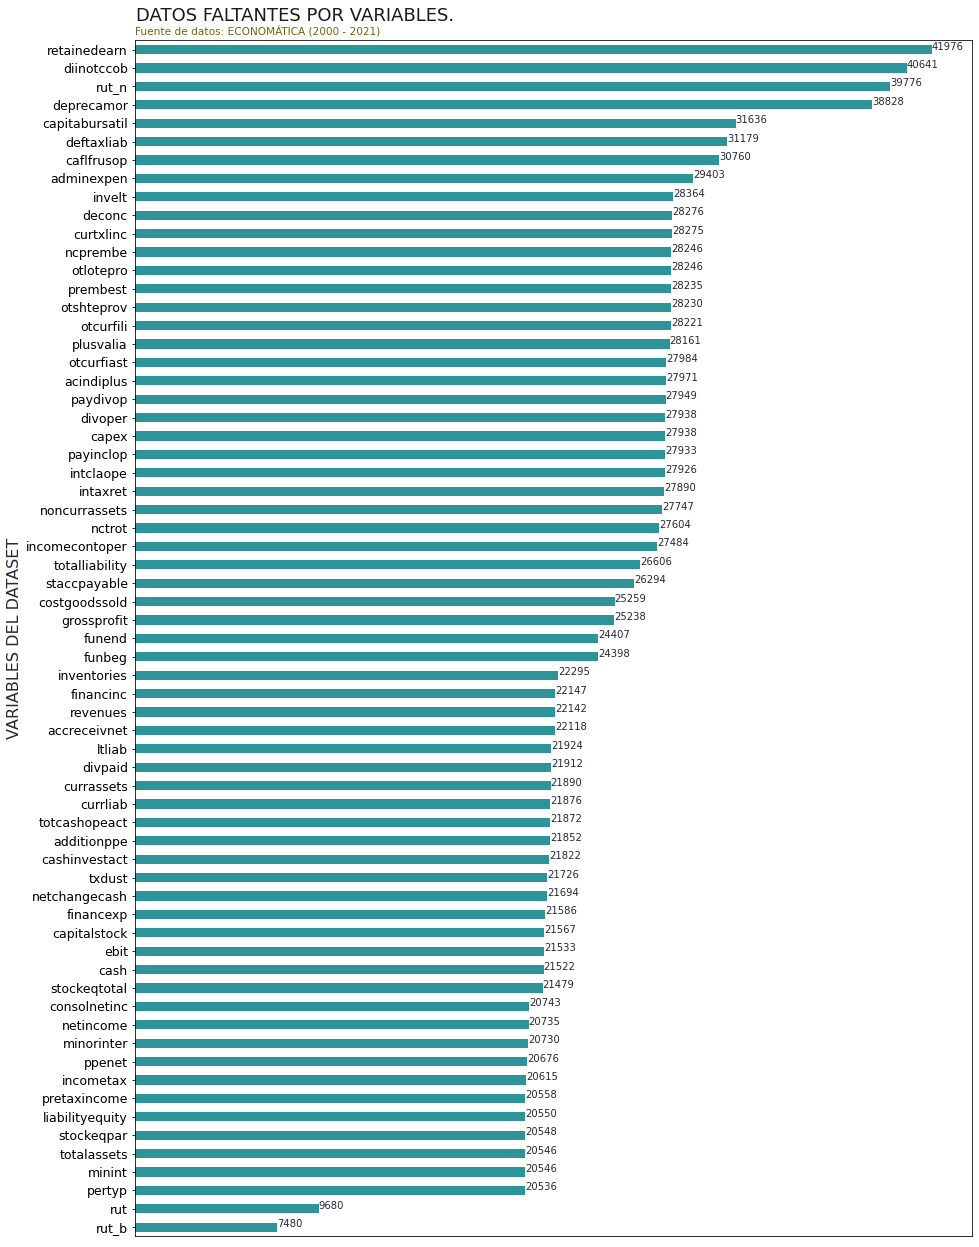

In [9]:
datos.isnull().sum().sort_values(ascending = True).loc['rut_b':].plot(kind = 'barh',
                                                       figsize = (15,22),
                                                        legend = None,
                                                         color = '#2D9499')

# plt.xticks(rotation = 45,
#           fontsize = 12)
plt.xticks([])
plt.yticks(fontsize = 12.5)

plt.suptitle('DATOS FALTANTES POR VARIABLES.',
            color = '#1C191C',
            fontsize = 18,
            ha = 'left',
            x = 0.126,
            y = 0.901)

plt.title('Fuente de datos: ECONOMÁTICA (2000 - 2021)',
         color = '#70680F',
         fontsize = 10.5,
         loc = 'left')

# plt.xlabel('CANTIDAD DE DATOS FALTANTES',
#           fontsize = 16,
#            color = '#272738')

plt.ylabel('VARIABLES DEL DATASET',
          fontsize = 16,
           color = '#272738')

for i,v in enumerate(datos.isnull().sum().sort_values(ascending = True).loc['rut_b':]):
    plt.text(v+1,
            i,
            str(v),
            color = '#272738')
plt.show()


#### <center>*Se visualizan gran cantidad de valores faltantes, la variable que más acumula es RETAINEDEARN, además se excluyeron de gráfico de barra las variables que no tienen valores nulos.*

### Veremos los tipos de datos para normalizar las variables que esten mal asignadas.

In [10]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41976 entries, 0 to 41975
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             41976 non-null  int64  
 1   quarter          41976 non-null  int64  
 2   tic_bolsa        41976 non-null  object 
 3   tic              41976 non-null  object 
 4   nombre           41976 non-null  object 
 5   rut              32296 non-null  object 
 6   naic             41976 non-null  object 
 7   deprecamor       3148 non-null   float64
 8   caflfrusop       11216 non-null  float64
 9   incometax        21361 non-null  float64
 10  ebit             20443 non-null  float64
 11  pertyp           21440 non-null  float64
 12  capex            14038 non-null  float64
 13  accreceivnet     19858 non-null  float64
 14  acindiplus       14005 non-null  float64
 15  additionppe      20124 non-null  float64
 16  adminexpen       12573 non-null  float64
 17  capitalstock

### Analizar porque la variable CAPITABURSATIL es de tipo objeto. 

In [11]:
datos.capitabursatil.value_counts()

-               7600
30000              5
1515.578847        5
15853.34604        4
10000              4
                ... 
715228.9372        1
3756614.937        1
86582.26444        1
117466.21603       1
988356.9046        1
Name: capitabursatil, Length: 2619, dtype: int64

### Eliminaremos los registros ' - ' para hacer la conversión a dato tipo float.

In [12]:
datos.capitabursatil = datos.capitabursatil.replace('-', np.nan)

### Reemplazaremos el '.' por vacio porque el dato es un valor entero pero lo dejaremos como tipo float.

In [13]:
datos.capitabursatil = datos.capitabursatil.str.replace('.', '').astype(float)

<ipython-input-13-bda4b6c75bdb>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  datos.capitabursatil = datos.capitabursatil.str.replace('.', '').astype(float)


### Verificamos que la variable fue reemplazada con exito.

In [14]:
datos.capitabursatil.head()

0    3.105657e+10
1    1.144880e+05
2    7.809419e+09
3    4.975389e+10
4    4.119749e+10
Name: capitabursatil, dtype: float64

### Cambiaremos el tipo de dato de float a string de la variable RUT_N.

In [15]:
datos.rut_n = datos.rut_n.astype(str) 

### Calcúlo de indicadores económicos.

In [16]:
datos = datos.assign(\
                                       razon_de_liquidez = lambda x:(x['currassets'] / x['currliab']),\
                                            prueba_acida = lambda x:(x['currassets'] - x['inventories'])/x['currliab'],\
                                      capital_de_trabajo = lambda x:(x['currassets'] - x['currliab']),\
                             rotacion_de_activos_totales = lambda x:(x['revenues'] / x['totalassets']),\
                             rotacion_capital_de_trabajo = lambda x:(x['revenues'] / x['capital_de_trabajo']),\
                                 rotacion_de_inventarios = lambda x:(x['costgoodssold'] / x['inventories']),\
                          rotacion_de_cuentas_por_cobrar = lambda x:(x['revenues']/x['deconc']),\
               rotacion_de_cuentas_por_pagar_proveedores = lambda x:(x['costgoodssold']/x['staccpayable']),\
                                     dias_de_inventario  = lambda x:(365/x['rotacion_de_inventarios']),\
                               dias_de_cuenta_por_cobrar = lambda x:(365/x['rotacion_de_cuentas_por_cobrar']),\
                                dias_de_cuenta_por_pagar = lambda x:(365/x['rotacion_de_cuentas_por_pagar_proveedores']),\
                                           endeudamiento = lambda x:(x['totalliability']/x['totalassets']),\
                          deuda_de_largo_plazo_a_activos = lambda x:(x['totalliability']/x['ltliab']),\
                                          apalancamiento = lambda x:(x['totalliability']/x['stockeqtotal']),\
                            multiplicador_del_patrimonio = lambda x:(x['totalassets']/x['stockeqtotal']),\
                                  cobertura_de_intereses = lambda x:(x['ebit']/x['financexp']),\
                                   flujo_de_caja_a_deuda = lambda x:(x['totcashopeact']/x['totalliability']),\
                                            margen_bruto = lambda x:(x['grossprofit']/x['revenues']),\
                                      margen_operacional = lambda x:(x['ebit']/x['revenues']),\
                      margen_utilidad_antes_de_impuestos = lambda x:(x['pretaxincome']/datos['revenues']),\
                                             margen_neto = lambda x:(x['netincome']/x['revenues']),\
                                 retorno_neto_de_activos = lambda x:(x['netincome']/x['totalassets']),\
                                                     ROE = lambda x:(x['netincome']/x['stockeqtotal']),\
           Utilidad_neta_div_Utilidad_antes_de_impuestos = lambda x:(x['netincome']/x['pretaxincome']),\
    Utilidad_antes_de_impuestos_div_Utilidad_operacional = lambda x:(x['pretaxincome']/x['ebit']),\
                         Utilidad_operacional_div_Ventas = lambda x:(x['ebit']/x['revenues']),\
                                         ciclo_operativo = lambda x:(x['dias_de_inventario']/x['dias_de_cuenta_por_cobrar']),\
                                              ciclo_caja = lambda x:(x['ciclo_operativo'] - x['dias_de_cuenta_por_pagar']),\
            )

### Verificaremos la cantidad de variables nuevas creadas como indicadores.

In [17]:
datos_NuCol = datos.shape[1] - datos_col1
print('Se calcularon {} indicadores para evaluar a las empresas'.format(datos_NuCol))

Se calcularon 28 indicadores para evaluar a las empresas


#### <center>*Se crearon 28 nuevas variables para realizar comparaciones de indicadores económicos.* 

### Reemplazamos los valores que hubieran resultado infinito de las nuevas variables calculadas con NAN. 

In [18]:
datos.replace([np.inf, -np.inf], np.nan, inplace = True)

### Revisaremos cuantas empresas hay por sector económico para luego seleccionar los datos a analizar. 

In [19]:
Cant_EmpxSect = datos.groupby('naic').agg({'tic' : pd.Series.nunique}).sort_values(by = 'tic').reset_index()
Cant_EmpxSect[list(Cant_EmpxSect.tic).index(10):].set_axis(['Sector_Económico', 'Cantidad_Empresas'], axis = 1)

,Sector_Económico,Cantidad_Empresas
89,Industria de las bebidas,10
90,Servicios relacionados con el transporte por agua,10
91,Grandes almacenes,10
92,Inmobiliarias y corredores de bienes raíces,11
93,"Agua, alcantarrillado y otros sistemas",13
94,Alquiler sin intermediación de bienes raíces,13
95,Instituciones financieras de fomento económico,14
96,Servicios relacionados con los servicios inmob...,16
97,Servicios relacionados con el transporte por c...,17
98,Bancos,18


#### <center>*Seleccionaremos de la variable sector económico (NAIC) al registro DEPORTISTAS Y EQUIPOS DEPORTIVOS PROFESIONALES, el cual tiene 20 registros unicos asociados en la variable cantidad de empresas (TIC).*

### Observaremos cuales son las 20 registros unicos que contiene la variable Deportistas_Equipos. 

In [20]:
pd.DataFrame(datos[datos.naic == 'Deportistas y equipos deportivos profesionales']['tic'].unique()).\
                                                                                set_axis(['Deportistas_Equipos'], axis = 1)

,Deportistas_Equipos
0,AZUL AZUL
1,COLO COLO
2,CDCRAIG-A
3,POLO
4,CPALESTINO
5,CHCONCEP
6,CHPENUELAS
7,CHPTARENAS
8,CRUZADOS
9,DEPRECOLETA


#### <center>*Seleccionaremos el equipo de COLO COLO para analizar su deuda durante el tiempo y luego compararemos con otros equipos similares.*

### Analizaremos el comportamiento de la deuda total por año del club COLO COLO.

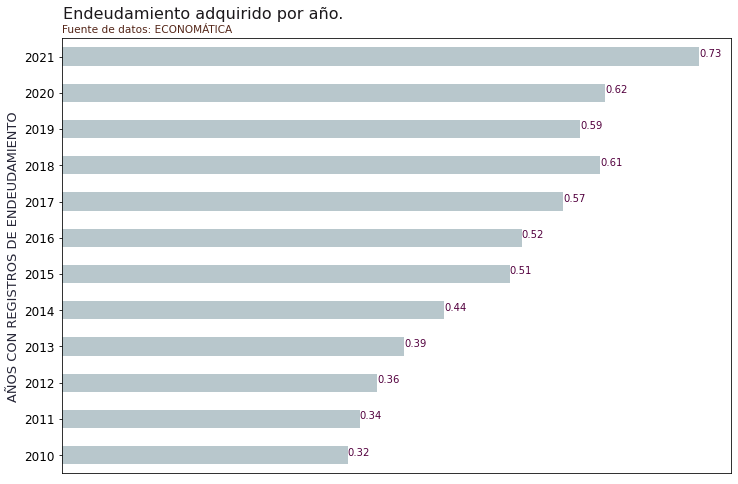

In [21]:
datos[datos.tic == 'COLO COLO'].loc[:,['year','endeudamiento']].dropna().groupby('year').\
                                                    endeudamiento.agg('mean').loc[2010:,].\
                                                                             plot(kind = 'barh',
                                                                                 figsize = (12,8),
                                                                                 legend = None,
                                                                                 color = '#B8C7CC')


plt.xticks([])
plt.yticks(fontsize = 12)

plt.suptitle('Endeudamiento adquirido por año.',
            color = '#1C191C',
            fontsize = 16,
            ha = 'left',
            x = 0.126,
            y = 0.935)

plt.title('Fuente de datos: ECONOMÁTICA',
         color = '#542618',
         fontsize = 10.5,
         loc = 'left')

plt.ylabel('AÑOS CON REGISTROS DE ENDEUDAMIENTO',
          fontsize = 13,
           color = '#272738')

for i,v in enumerate(datos[datos.tic == 'COLO COLO'].loc[:,['year','endeudamiento']].dropna().groupby('year').\
                                                    endeudamiento.agg('mean')):
    plt.text(v,
            i,
            str(v)[0:4],
            color = '#53003E')

plt.show()

#### <center>*Visualizamos un alza en el nivel de endeudamiento del club desde el 2010 al 2021, solamente en 2019 se ve una disminución con respecto al año anterior, pero luego sigue su tendencia de alza.*

### Tambien analizaremos el comportamiento por fecha de la deuda.

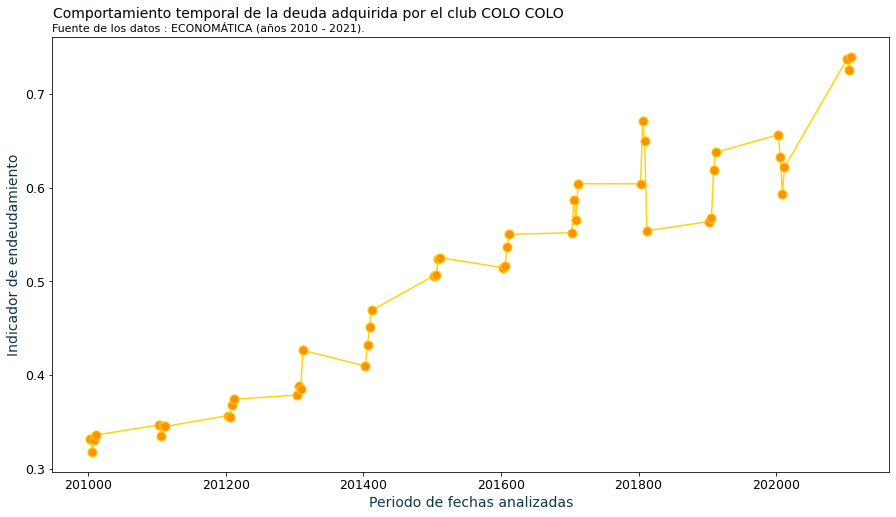

In [22]:
Equipo_Eval = datos[datos['tic'] == 'COLO COLO'].sort_values('date')

Equipo_Eval.plot('date', 
                 'endeudamiento', 
                  figsize = (15,8), 
                  marker = 'o',
                  markerfacecolor = '#FF910B',
                  markersize = 9.2,
                  color = '#FFD30D',
                 legend = None,
                 fontsize = 12.5,
                )

plt.title('Fuente de los datos : ECONOMÁTICA (años 2010 - 2021).',
          color = '#000407',
          fontsize = 11,
          loc = 'left',
         )

plt.suptitle('Comportamiento temporal de la deuda adquirida por el club COLO COLO',
          color = '#000407',
          fontsize = 14,
          x = 0.126,
          y = 0.932,
          ha = 'left'
         )

plt.xlabel('Periodo de fechas analizadas',
          fontsize = 14,
           color = '#0E394A'
          )

plt.ylabel('Indicador de endeudamiento',
          fontsize = 14,
           color = '#0E394A'
          )

plt.show()

#### <center>*Aqui podemos ver que solamente entre los años 2018 y 2020 hay una mayor variabilidad de la deuda en comparación con las demás fechas y además coincide con el estado temporal donde una baja con respecto a la tendencia al alza que venia adquiriendo COLO COLO.*   

### Realizaremos el modelo de descomposición estacional del comportamiento de la deuda.

In [23]:
Des_Est = sm.tsa.seasonal_decompose(Equipo_Eval.set_index('date').endeudamiento.dropna(),
                                         model = 'additive', period = 4)

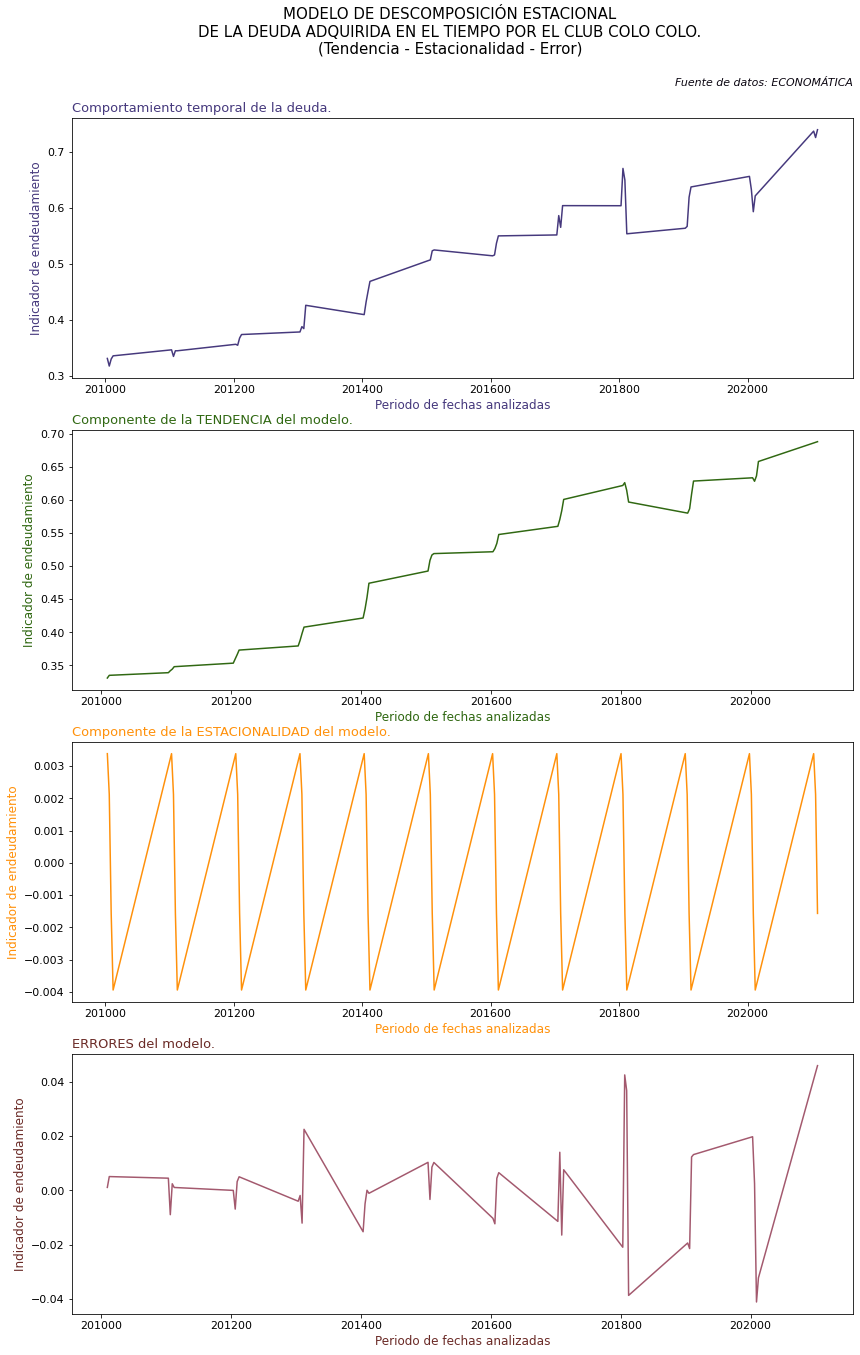

In [24]:
fig, axs = plt.subplots(4, figsize = (14, 22))

plt.suptitle('MODELO DE DESCOMPOSICIÓN ESTACIONAL\nDE LA DEUDA ADQUIRIDA EN EL TIEMPO POR EL CLUB COLO COLO.\n(Tendencia - Estacionalidad - Error)',
            fontsize = 15,
             y = 0.95)

plt.title('Fuente de datos: ECONOMÁTICA',
         loc = 'right',
          x = 1,
          y = 4.7,
          color = '#0C0712',
          fontstyle = 'italic',
         fontsize = 11)

# 01 Graficos de los datos 
Equipo_Eval.set_index('date').endeudamiento.dropna().plot(color = '#46397D',
                                                          ax = axs[0],
                                                          fontsize = 11)

axs[0].set_title('Comportamiento temporal de la deuda.',
                  color  = '#46397D',
                  loc    = 'left',
                fontsize = 13)

axs[0].set_xlabel('Periodo de fechas analizadas',
                 fontsize = 12,
                 color = '#46397D')

axs[0].set_ylabel('Indicador de endeudamiento',
                 fontsize = 12,
                 color = '#46397D')

# 02 Grafico de la tendencia
Des_Est.trend.plot(color  = '#306812',
                       ax = axs[1],
                  fontsize = 11)

axs[1].set_title('Componente de la TENDENCIA del modelo.',
                  color = '#306812',
                  loc = 'left',
                fontsize = 13)

axs[1].set_xlabel('Periodo de fechas analizadas',
                 fontsize = 12,
                 color = '#306812')

axs[1].set_ylabel('Indicador de endeudamiento',
                 fontsize = 12,
                 color = '#306812')

# 03 Grafico de la estacionalidad
Des_Est.seasonal.plot(color = '#FF910B',
                          ax = axs[2],
                      fontsize = 11)

axs[2].set_title('Componente de la ESTACIONALIDAD del modelo.',
                  color = '#FF910B',
                  loc = 'left',
                fontsize = 13)

axs[2].set_xlabel('Periodo de fechas analizadas',
                 fontsize = 12,
                 color = '#FF910B')

axs[2].set_ylabel('Indicador de endeudamiento',
                 fontsize = 12,
                 color = '#FF910B')

# 04 Grafico de los errores
Des_Est.resid.plot(color = '#A3596E',
                      ax = axs[3],
                   fontsize = 11
                  )

axs[3].set_title('ERRORES del modelo.',
                  color = '#6B2B27',
                  loc = 'left',
                fontsize = 13)

axs[3].set_xlabel('Periodo de fechas analizadas',
                 fontsize = 12,
                 color = '#6B2B27')

axs[3].set_ylabel('Indicador de endeudamiento',
                 fontsize = 12,
                 color = '#6B2B27')

plt.show()

####  *En la primera gráfica vemos el comportamiento de los datos de la deuda sin descomposición durante un rango de fechas que va desde el año 2010 al 2021.*
#### *En la segunda gráfica podemos apreciar el comportamiento de la tendencia que muestra una forma identica a los datos, lo que nos indica que el alza de la deuda seguira incrementandose durante el tiempo ya que los valores que toma el modelo son del periodo anterior para realizar un marcador de tendencia.*
#### *La tercera gráfica nos entrega la información de la estacionalidad y podemos verificar que la forma es una sierra perfectal, la cuál marca que por año tenemos 2 caídas al principio del primer trimestre y del tercero, los picks positivos se dan al comienzo del segundo y el cuarto.*
#### *La tercera gráfica nos entrega los errores del modelo, aqui observamos dos periodos donde el modelo tiene mayor diferencia entre lo predicho y lo real que serian entre 2013 - 2014 y 2018 - 2021, este último con un error mucho mayor posiblemente debido a una crisis por estar peleando el descenso de la categoría.*


### Realizaremos resumenes estadísticos para seleccionar más variables de estudio del equipo COLO COLO.

In [25]:
aux = []

for VarCol in datos.columns:
    if datos[VarCol].dtype == 'float64':
        aux.append(VarCol)
        
ind = aux[aux.index('razon_de_liquidez'):]
ind

['razon_de_liquidez',
 'prueba_acida',
 'capital_de_trabajo',
 'rotacion_de_activos_totales',
 'rotacion_capital_de_trabajo',
 'rotacion_de_inventarios',
 'rotacion_de_cuentas_por_cobrar',
 'rotacion_de_cuentas_por_pagar_proveedores',
 'dias_de_inventario',
 'dias_de_cuenta_por_cobrar',
 'dias_de_cuenta_por_pagar',
 'endeudamiento',
 'deuda_de_largo_plazo_a_activos',
 'apalancamiento',
 'multiplicador_del_patrimonio',
 'cobertura_de_intereses',
 'flujo_de_caja_a_deuda',
 'margen_bruto',
 'margen_operacional',
 'margen_utilidad_antes_de_impuestos',
 'margen_neto',
 'retorno_neto_de_activos',
 'ROE',
 'Utilidad_neta_div_Utilidad_antes_de_impuestos',
 'Utilidad_antes_de_impuestos_div_Utilidad_operacional',
 'Utilidad_operacional_div_Ventas',
 'ciclo_operativo',
 'ciclo_caja']

In [32]:
pd.DataFrame(Equipo_Eval[ind].agg(['mean','min','max','std','var'])).T

,mean,min,max,std,var
razon_de_liquidez,4.285451,0.558839,29.050276,5.158979,2.661506e+01
prueba_acida,4.271387,0.558839,29.050276,5.155639,2.658061e+01
capital_de_trabajo,4019.813597,-3762.030600,13328.255000,3516.667239,1.236695e+07
rotacion_de_activos_totales,0.181147,0.000000,0.506577,0.120077,1.441843e-02
rotacion_capital_de_trabajo,-9.106065,-383.311131,59.908349,65.565036,4.298774e+03
rotacion_de_inventarios,117.738336,15.225988,358.155754,102.193710,1.044355e+04
rotacion_de_cuentas_por_cobrar,NaN,NaN,NaN,NaN,NaN
rotacion_de_cuentas_por_pagar_proveedores,4.322455,0.893799,10.662977,2.516096,6.330739e+00
dias_de_inventario,2.084589,0.000000,23.972171,4.688121,2.197848e+01
dias_de_cuenta_por_cobrar,0.000000,0.000000,0.000000,0.000000,0.000000e+00


### Del resumen estadístico seleccionaremos los siguientes indicadores del equipo COLO COLO y los analizaremos durante los años 2010 al 2021 .

In [39]:
Equipo_Eval.groupby('year')[['razon_de_liquidez', 'endeudamiento','Utilidad_operacional_div_Ventas','capital_de_trabajo']].\
                                    agg('mean').loc[2010:,]

,razon_de_liquidez,endeudamiento,Utilidad_operacional_div_Ventas,capital_de_trabajo
year,,,,
2010,3.815350,0.329108,-0.643786,5431.265975
2011,4.902570,0.343187,-0.076423,5759.168650
2012,4.468034,0.363570,-0.587387,5105.864775
2013,3.027861,0.394616,-0.345500,2914.080700
2014,2.100964,0.440630,0.172659,2593.654225
2015,1.378435,0.515668,-0.160778,1104.153475
2016,1.342782,0.529632,0.058499,1102.420800
2017,1.034310,0.577098,-0.054867,-47.175600
2018,1.190955,0.619709,0.086739,1234.752975


### Visualizaremos mediante gráficas de boxplot el comportamiento por año de las variables seleccionadas en especial su dispersión.

In [40]:
Ind_CC= datos[datos.tic == 'COLO COLO'].\
                        loc[:,['year','razon_de_liquidez', 'endeudamiento','Utilidad_operacional_div_Ventas','capital_de_trabajo']].\
                        dropna().loc[2010:]

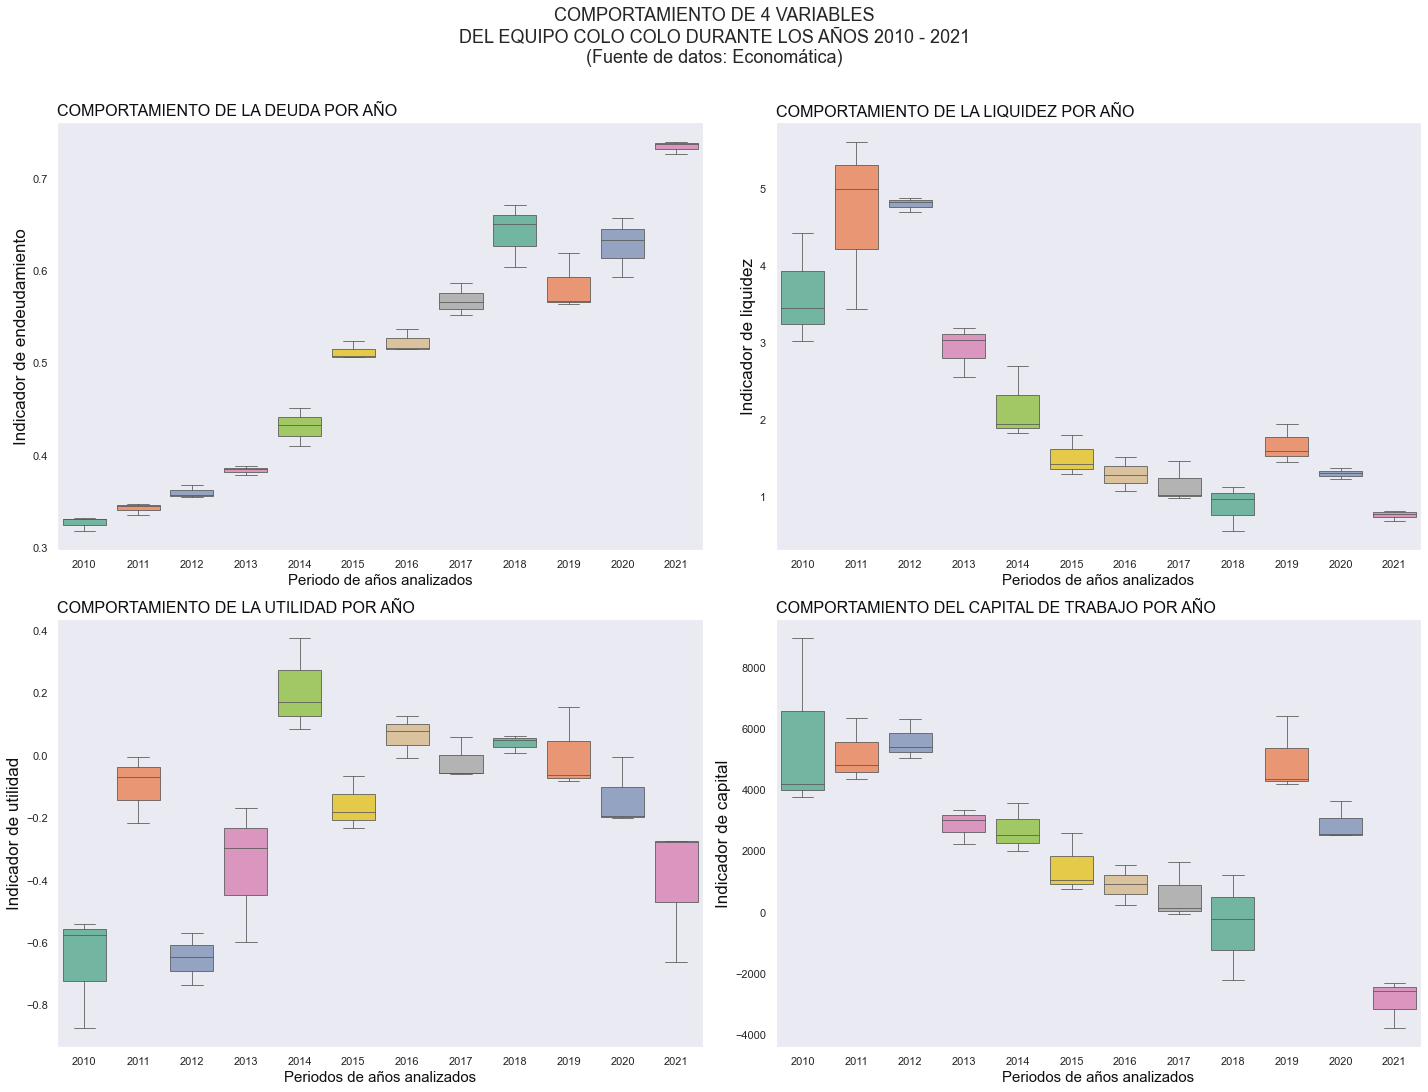

In [41]:
fig, axes = plt.subplots(2,2, figsize = (20,15))

fig.suptitle('COMPORTAMIENTO DE 4 VARIABLES\nDEL EQUIPO COLO COLO DURANTE LOS AÑOS 2010 - 2021\n(Fuente de datos: Economática)',
            fontsize = 18,
            y = 1.01)

sns.set_theme(style="dark")

# ---------------------------------------------------------------------------------------------
# ENDEUDAMIENTO
# ---------------------------------------------------------------------------------------------
sns.boxplot(ax = axes[0,0],
            x="year", 
            y="endeudamiento", 
            data = Ind_CC, 
            palette = 'Set2',
           linewidth = 0.8)

axes[0,0].set_title('COMPORTAMIENTO DE LA DEUDA POR AÑO',
                   loc = 'left',
                   fontsize = 16,
                   color = '#0F0F0D') 

axes[0,0].set_xlabel('Periodo de años analizados',
                     color = '#0F0F0D',
                    fontsize = 15)

axes[0,0].set_ylabel('Indicador de endeudamiento',
                     color = '#0F0F0D',
                    fontsize = 17)
# ---------------------------------------------------------------------------------------------
# RAZÓN DE LIQUIDEZ
# ---------------------------------------------------------------------------------------------
axes[0,1].set_title('COMPORTAMIENTO DE LA LIQUIDEZ POR AÑO',
                   loc = 'left',
                   fontsize = 16,
                   color = '#0F0F0D')

sns.boxplot(ax = axes[0,1],
            x="year", 
            y="razon_de_liquidez",
            data = Ind_CC, 
            palette = 'Set2',
           linewidth = 0.8)

axes[0,1].set_xlabel('Periodos de años analizados',
                     color = '#0F0F0D',
                    fontsize = 15)

axes[0,1].set_ylabel('Indicador de liquidez',
                     color = '#0F0F0D',
                    fontsize = 17)
# ---------------------------------------------------------------------------------------------
# UTILIDAD OPERACIONAL DIV VENTAS
# ---------------------------------------------------------------------------------------------
axes[1,0].set_title('COMPORTAMIENTO DE LA UTILIDAD POR AÑO',
                   loc = 'left',
                   fontsize = 16,
                   color = '#0F0F0D')

sns.boxplot(ax = axes[1,0],
            x="year", 
            y="Utilidad_operacional_div_Ventas",
            data = Ind_CC, 
            palette = 'Set2',
           linewidth = 0.8)

axes[1,0].set_xlabel('Periodos de años analizados',
                     color = '#0F0F0D',
                    fontsize = 15)

axes[1,0].set_ylabel('Indicador de utilidad',
                     color = '#0F0F0D',
                    fontsize = 17)
# ---------------------------------------------------------------------------------------------
# CAPITAL DE TRABAJO
# ---------------------------------------------------------------------------------------------
axes[1,1].set_title('COMPORTAMIENTO DEL CAPITAL DE TRABAJO POR AÑO',
                   loc = 'left',
                   fontsize = 16,
                   color = '#0F0F0D')

sns.boxplot(ax = axes[1,1],
            x="year", 
            y="capital_de_trabajo",
            data = Ind_CC, 
            palette = 'Set2',
           linewidth = 0.8)

axes[1,1].set_xlabel('Periodos de años analizados',
                     color = '#0F0F0D',
                    fontsize = 15)

axes[1,1].set_ylabel('Indicador de capital',
                     color = '#0F0F0D',
                    fontsize = 17)

plt.tight_layout()
plt.show()

####  *En la primera gráfica vemos el comportamiento de la deuda por año, podemos apreciar la tendencia al alza de esta como tambien la dispersión por año, entre el 2010 - 2013 no se ve gran variabilidad ya el 2014 el boxplot muestra una mayor dispersión, en el 2015 - 2017 esta dispersión disminuye y a partir del 2018 - 2020 aumenta considerablemente quizas tratando de disminuir  endeudamiento que se logra en el 2019 y en algo en el 2020, en el 2021 se vuelve a la tendencia del alza y la dispersión disminuye podriamos pensar que se tomaron pocos creditos y de montos muy similares.*

####  *En la segunda gráfica vemos el comportamiento de la liquidez por año, podemos apreciar la tendencia a la baja, los mayores niveles se visualizan en los años 2011 -  2012, durante el 2019 y 2020 subieron en algo los indices de liquidez pero en 2021 vuelve la tendencia a la baja el cual coinciden con la crisis del club.*

####  *En la tercera gráfica vemos el comportamiento de la utilidad por año, aca no hay una tendencia clara y podemos ver que el mayor nivel se da en el año 2014 y el más bajo en 2012, el año con mayor dispersión es el 2013.*

####  *En la cuarta gráfica vemos el comportamiento del capital de trabajo por año, de la cual  el mayor nivel se da en el año 2010 y se aprecia una tendencia a la baja teniendo un repunte en los años 2019 y 2020 pero volviendo a caer en el 2021 año de la crisis en la institución.*

### Realizaremos una comparación de los 3 equipos más grande del país tomando como variables de estudio el endeudamiento y la liquidez de estos durante los periodos 2010 - 2021.

In [42]:
COMPARATIVA = datos[datos.tic.isin(['COLO COLO', 'AZUL AZUL', 'CRUZADOS'])].\
                                                loc[:,['tic','year','endeudamiento','razon_de_liquidez']].dropna().loc[2010:,]

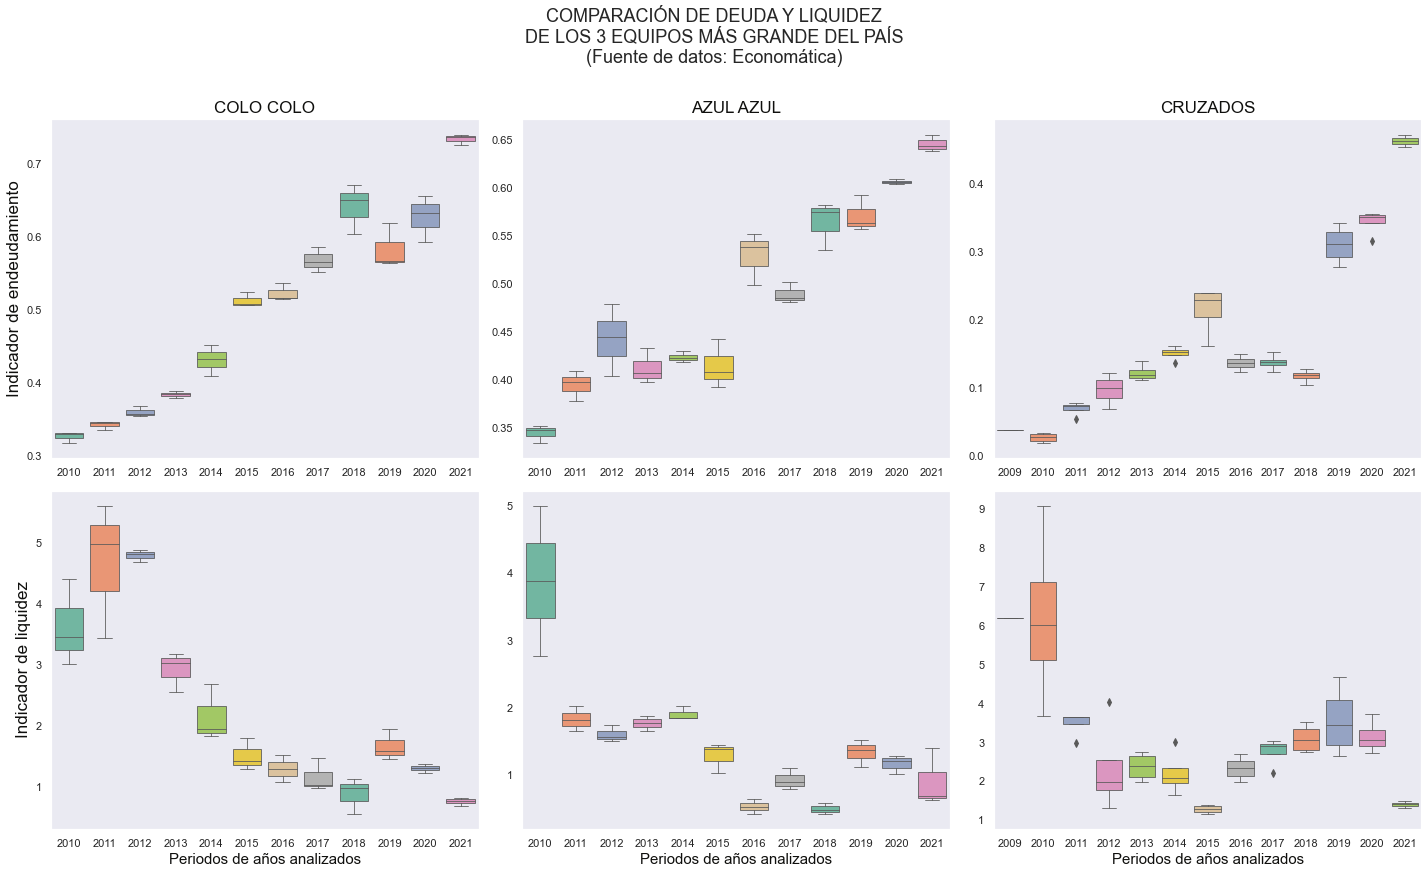

In [43]:
fig, axes = plt.subplots(2,3, figsize = (20,12))

fig.suptitle('COMPARACIÓN DE DEUDA Y LIQUIDEZ\nDE LOS 3 EQUIPOS MÁS GRANDE DEL PAÍS\n(Fuente de datos: Economática)',
            fontsize = 18,
            y = 1.01)

sns.set_theme(style="dark")

# ---------------------------------------------------------------------------------------------
# DATOS DE ENDEUDAMIENTO
# ---------------------------------------------------------------------------------------------
# COLO COLO
sns.boxplot(ax = axes[0,0],
            x="year", 
            y="endeudamiento", 
            data = COMPARATIVA[COMPARATIVA.tic == 'COLO COLO'], 
            palette = 'Set2',
           linewidth = 0.8)

axes[0,0].set_title('COLO COLO',
                   loc = 'center',
                   fontsize = 17,
                   color = '#0F0F0D') 

axes[0,0].set(xlabel=None)

axes[0,0].set_ylabel('Indicador de endeudamiento',
                     color = '#0F0F0D',
                    fontsize = 17)
# ---------------------------------------------------------------------------------------------
# AZUL AZUL
sns.boxplot(ax = axes[0,1],
            x="year", 
            y="endeudamiento", 
            data = COMPARATIVA[COMPARATIVA.tic == 'AZUL AZUL'], 
            palette = 'Set2',
           linewidth = 0.8)

axes[0,1].set_title('AZUL AZUL',
                   loc = 'center',
                   fontsize = 17,
                   color = '#0F0F0D')

axes[0,1].set(xlabel=None)

axes[0,1].set(ylabel=None)
# ---------------------------------------------------------------------------------------------
# CRUZADOS
sns.boxplot(ax = axes[0,2],
            x="year", 
            y="endeudamiento", 
            data = COMPARATIVA[COMPARATIVA.tic == 'CRUZADOS'], 
            palette = 'Set2',
           linewidth = 0.8)

axes[0,2].set_title('CRUZADOS',
                   loc = 'center',
                   fontsize = 17,
                   color = '#0F0F0D')

axes[0,2].set(xlabel=None)

axes[0,2].set(ylabel=None)

# ---------------------------------------------------------------------------------------------
# DATOS DE LIQUIDEZ
# ---------------------------------------------------------------------------------------------
# COLO COLO
sns.boxplot(ax = axes[1,0],
            x="year", 
            y="razon_de_liquidez",
            data = COMPARATIVA[COMPARATIVA.tic == 'COLO COLO'], 
            palette = 'Set2',
           linewidth = 0.8)

axes[1,0].set_xlabel('Periodos de años analizados',
                     color = '#0F0F0D',
                    fontsize = 15)

axes[1,0].set_ylabel('Indicador de liquidez',
                     color = '#0F0F0D',
                    fontsize = 17)
# ---------------------------------------------------------------------------------------------
# AZUL AZUL
sns.boxplot(ax = axes[1,1],
            x="year", 
            y="razon_de_liquidez", 
            data = COMPARATIVA[COMPARATIVA.tic == 'AZUL AZUL'], 
            palette = 'Set2',
           linewidth = 0.8)

axes[1,1].set(ylabel=None)

axes[1,1].set_xlabel('Periodos de años analizados',
                     color = '#0F0F0D',
                    fontsize = 15)
# ---------------------------------------------------------------------------------------------
# CRUZADOS
sns.boxplot(ax = axes[1,2],
            x="year", 
            y="razon_de_liquidez", 
            data = COMPARATIVA[COMPARATIVA.tic == 'CRUZADOS'], 
            palette = 'Set2',
           linewidth = 0.8)

axes[1,2].set(ylabel=None)

axes[1,2].set_xlabel('Periodos de años analizados',
                     color = '#0F0F0D',
                    fontsize = 15)

plt.tight_layout()
plt.show()

####  *La primera comparación que realizaremos sera por la variable de endeudamiento, como ya se aprecio anteriormente para el equipo COLO COLO la tendencia al alza es muy clara en cambio para AZUL AZUL entre los años 2011 - 2015 se nota una estabilidad en la adquisición de deudas pero luego sigue una tendencia al alza en menor nivel que los que alcanza COLO COLO, los CRUZADOS tienen una clara tendencia al alza los primeros años del 2010 - 2015 pero luego retoman la linea de la deuda de forma abrupta debido a multiples compromisos internacionales. Los niveles más altos son alcanzados por COLO COLO seguido por AZUL AZUL y por último CRUZADOS que son los más mesurados además de tener los niveles mas bajo de endeudamiento,  igual todos siguen una tendencia al alza llegando al año 2021 con una baja dispersión.*
####  *La segunda comparación la realizaremos sobre la variable de liquidez, aqui vemos una clara tendencia a la baja del equipo COLO COLO tratando de mejorar en el año 2019 pero luego retornando a la baja, AZUL AZUL y CRUZADOS  muestran más estabilidad en su liquidez desde el 2011, los niveles más altos son alcanzados por CRUZADOS seguido por COLO COLO y luego AZUL AZUL, todos llegan a niveles similares en el 2021 siendo CRUZADOS el que muestra mayor dispersión.*